768 9
   Pregnancies  PlasmaGlucose  BloodPressure  SkinThickness  Insulin  \
0            6            148             72             35        0   
1            1             85             66             29        0   
2            8            183             64              0        0   
3            1             89             66             23       94   
4            0            137             40             35      168   

   BodyMassIndex  DiabetesPedigree  Age  Outcome  
0           33.6             0.627   50        1  
1           26.6             0.351   31        0  
2           23.3             0.672   32        1  
3           28.1             0.167   21        0  
4           43.1             2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Plasm

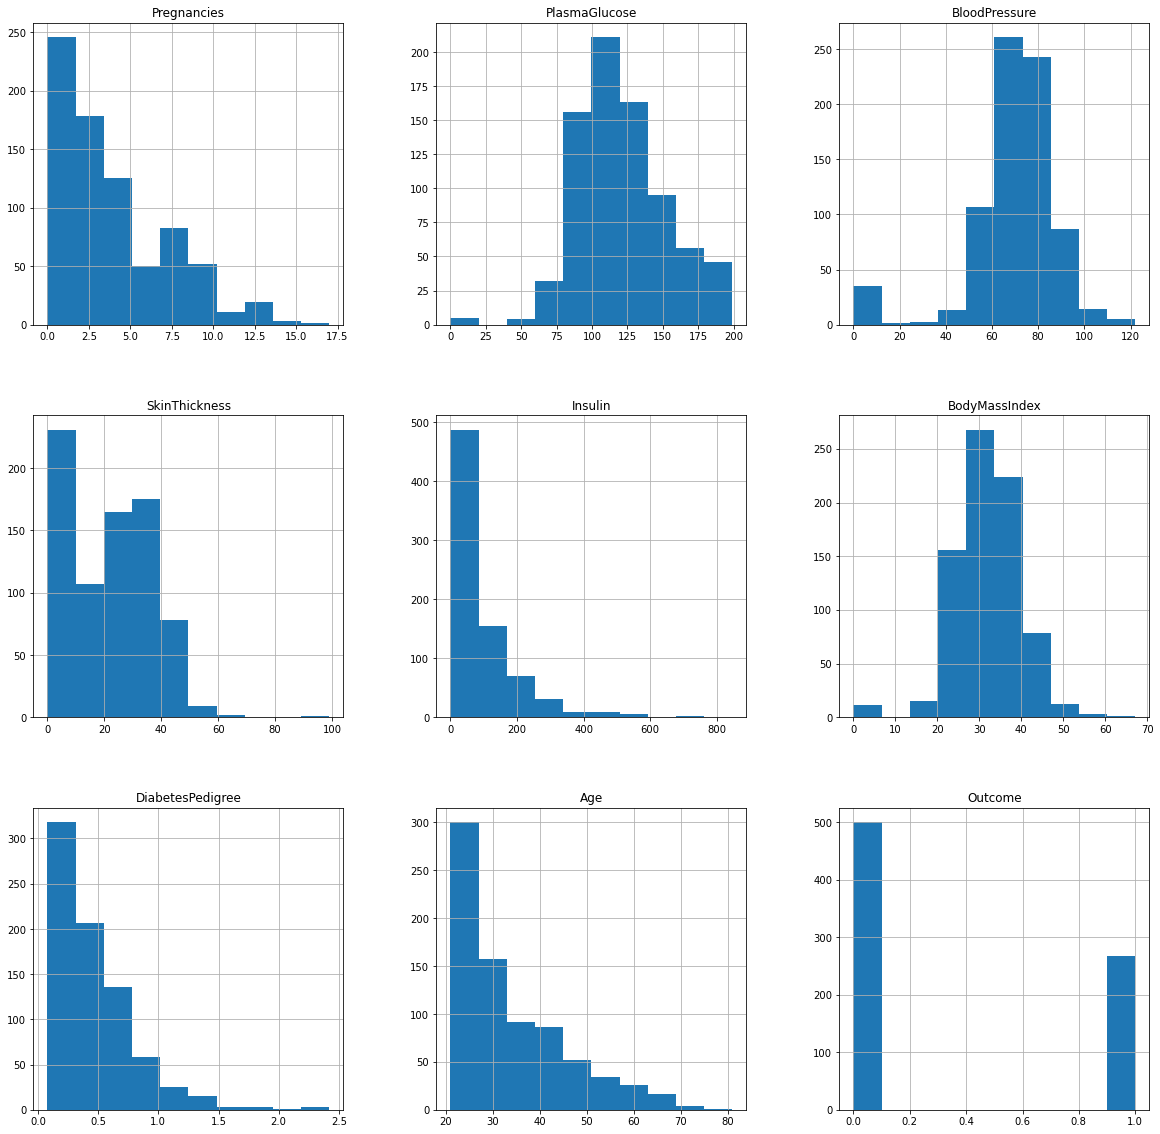

0    500
1    268
Name: Outcome, dtype: int64


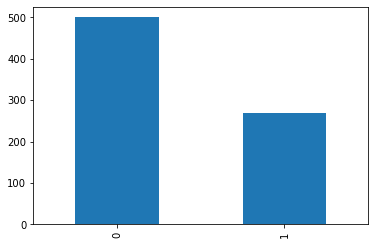

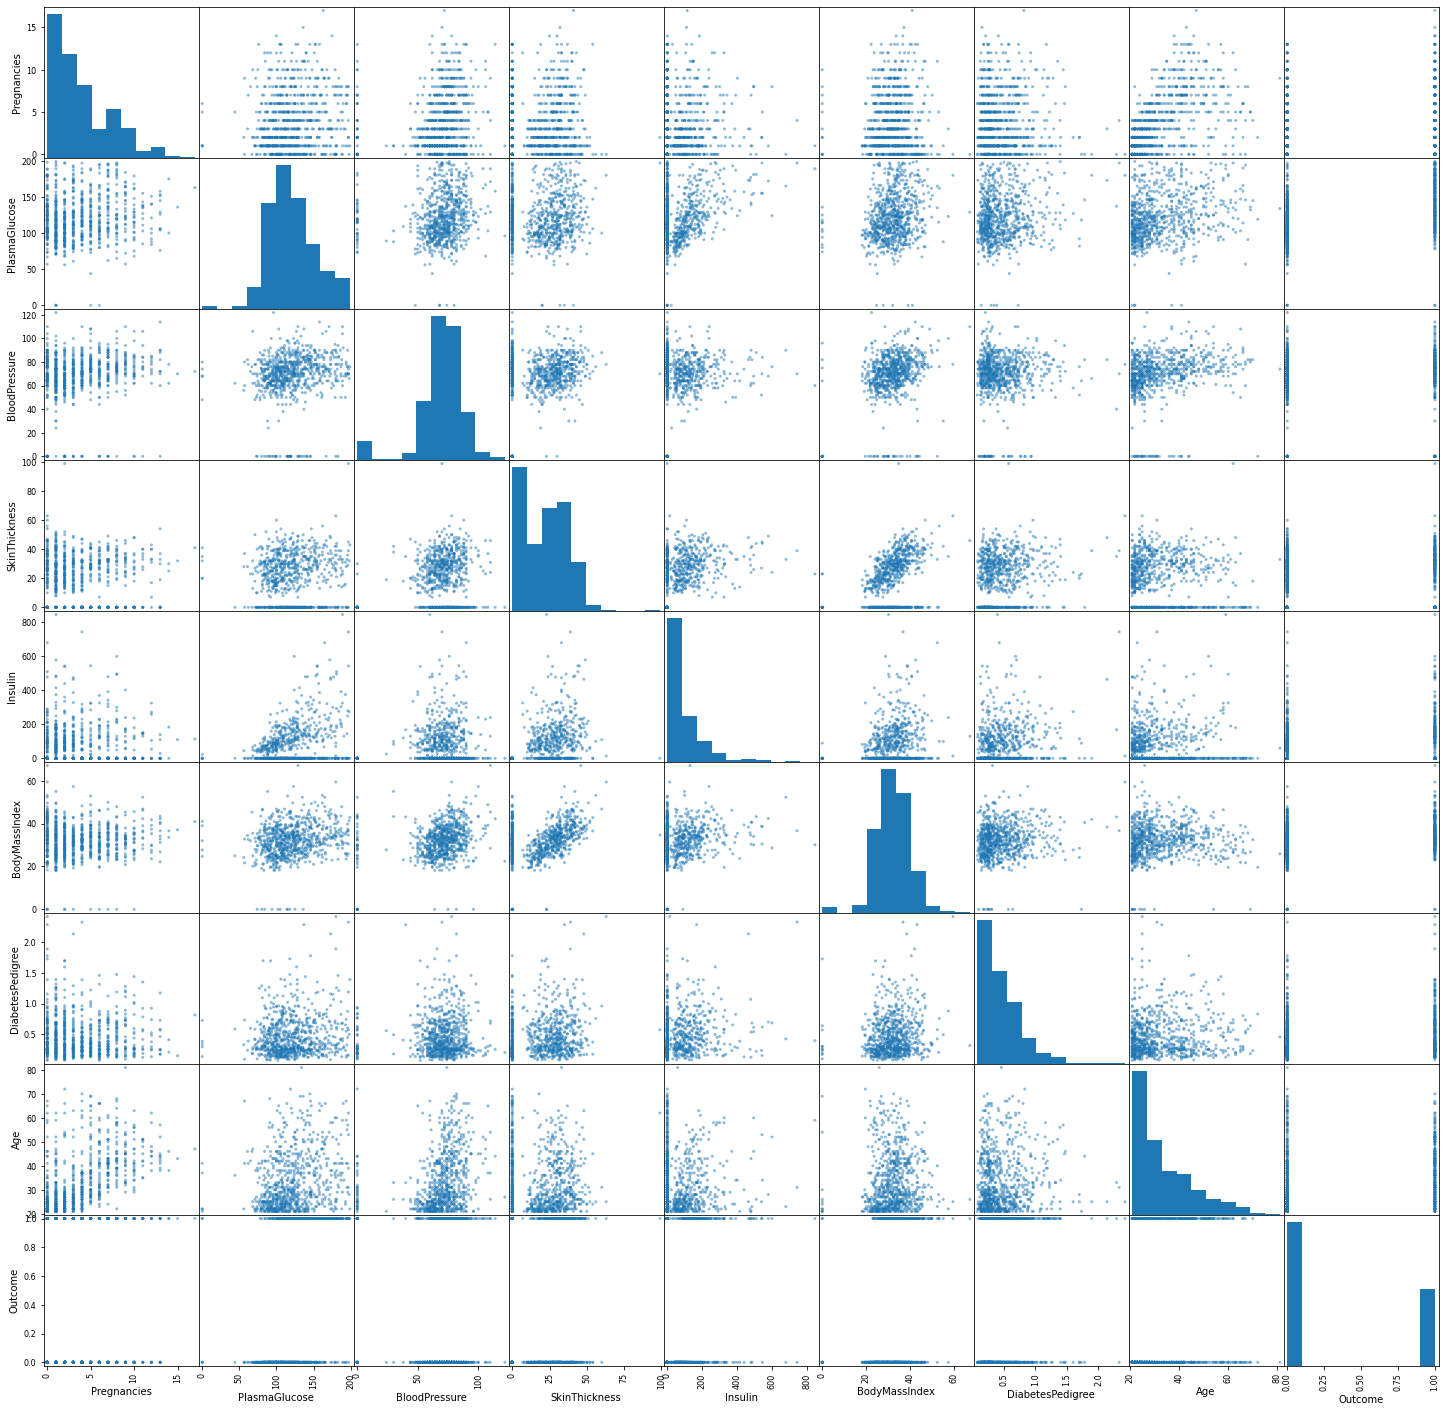

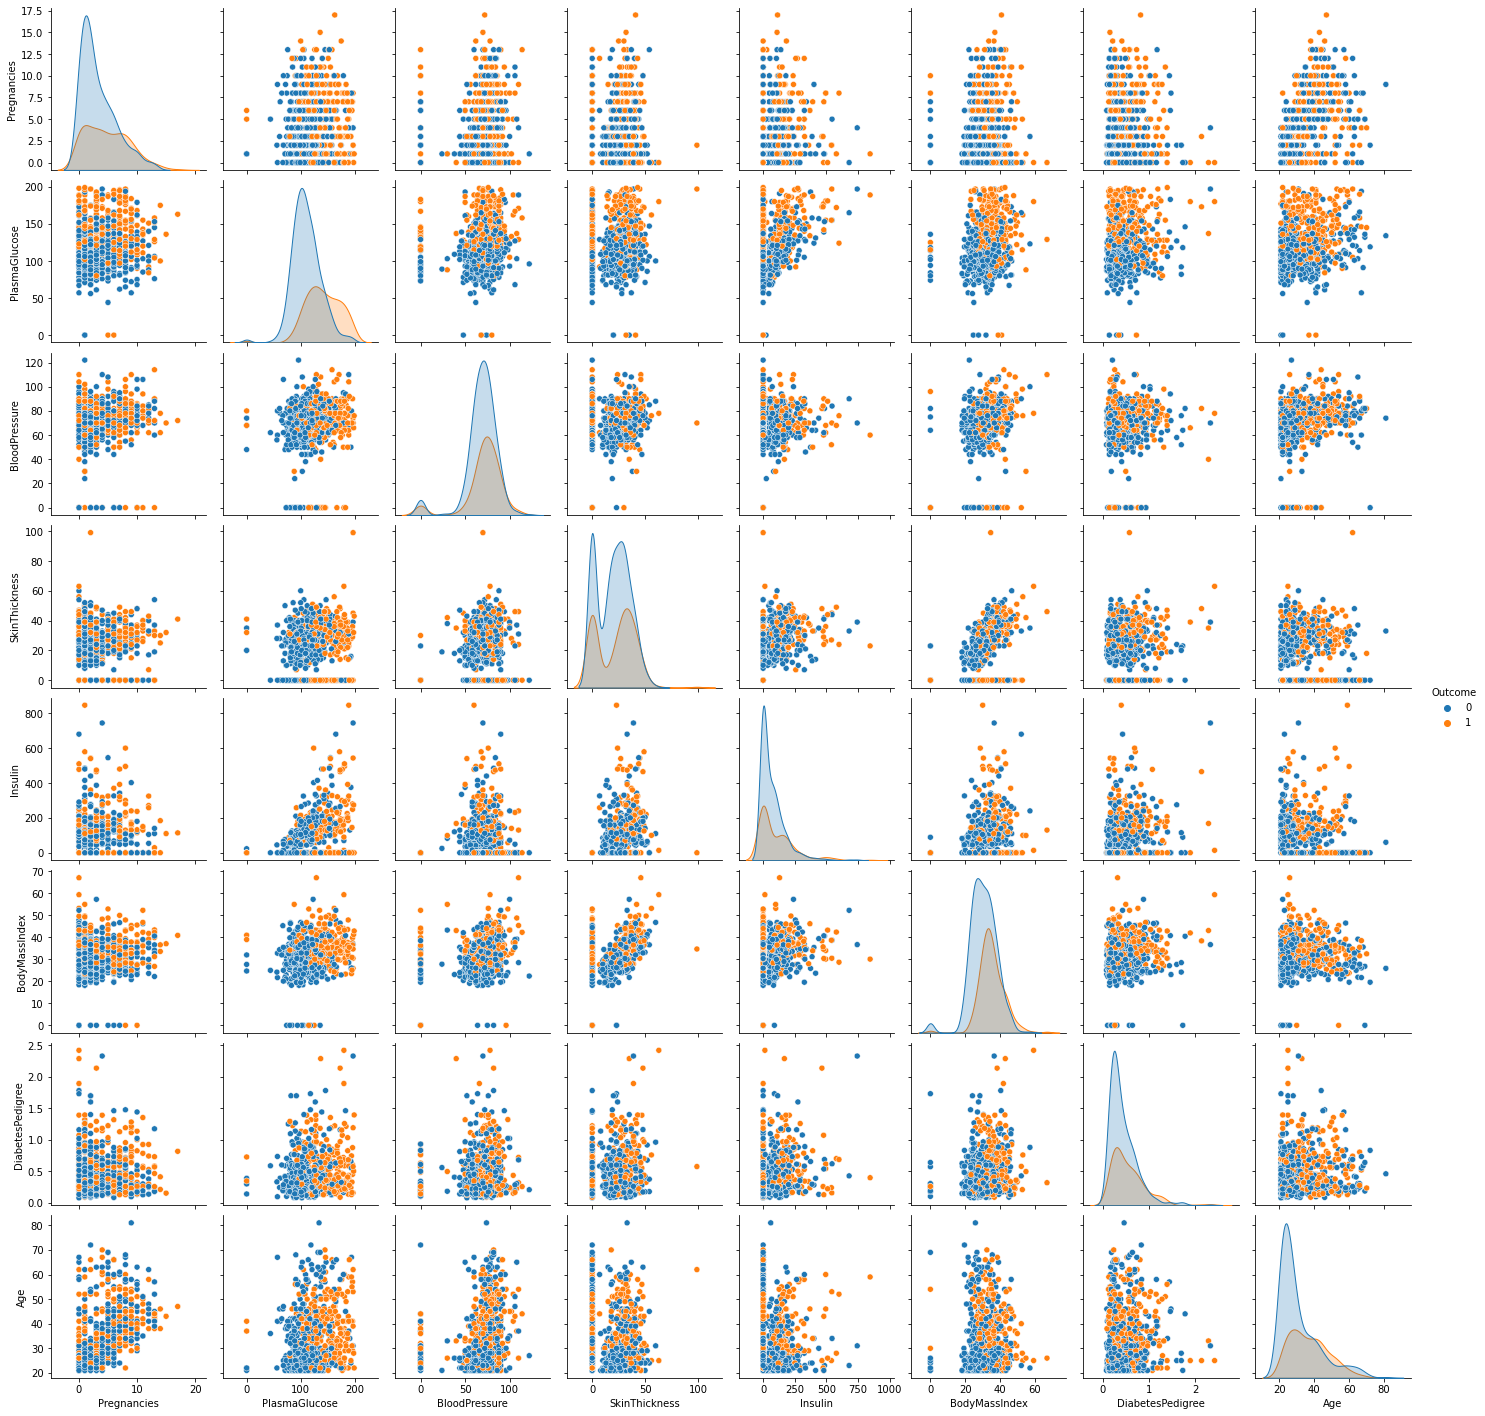

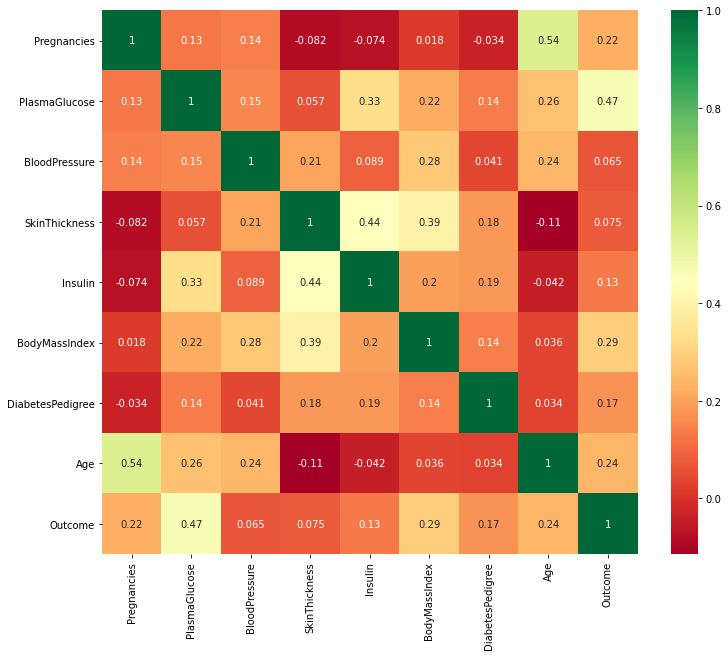

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]
Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       170
           1       0.68      0.58      0.63        86

    accuracy                           0.77       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256

[[146  24]
 [ 36  50]]
[0.727 0.727 0.74  0.662 0.714 0.753 0.727 0.805 0.684 0.776]
0.73 accuracy with a standard deviation of 0.04


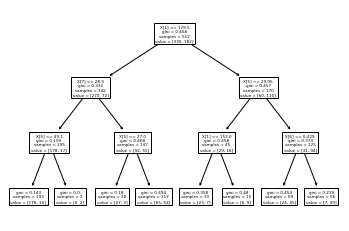

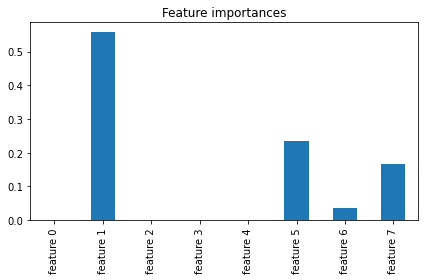

'\n    (d)  feature selections  (in part (c))\n          VS \n         tree. DecisionTreeClassifier.feature_importances_ (same as above)\n'

In [2]:
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies',
         'PlasmaGlucose',
         'BloodPressure',
         'SkinThickness',
         'Insulin',
         'BodyMassIndex',
         'DiabetesPedigree',
         'Age',
         'Outcome']
diabetes_data = pandas.read_csv(url, names=names)
array = diabetes_data.values
nrow, ncol = diabetes_data.shape

predictors = array[:, 0:8]
target = array[:, 8]

"""
    Assignment 
     Part A
"""

"""
  (a)
  1. In a report, it is necessary to describe the data for the readers
     They may want to know, how many records, how many features, and what data type they are
"""
print(nrow, ncol)

print(diabetes_data.head())

print(diabetes_data.info(verbose=True))

"""
  2. The reviewer of your report may also want to know 
    * count tells us the number of NoN-empty rows in a feature.
    * mean tells us the mean value of that feature.
    * std tells us the Standard Deviation Value of that feature.
    * min tells us the minimum value of that feature.
    * 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
    * max tells us the maximum value of that feature.
"""
print(diabetes_data.describe())  # row = record

print(diabetes_data.describe().T)  # row = features

"""
  3. visualization
"""

p = diabetes_data.hist(figsize=(20, 20))
plt.show()

# checking the balance of the data by plotting the count of outcomes by their value
print(diabetes_data.Outcome.value_counts())
p = diabetes_data.Outcome.value_counts().plot(kind="bar")
plt.show()

# The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
# For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

p = scatter_matrix(diabetes_data, figsize=(25, 25))
plt.show()

p = sns.pairplot(diabetes_data, hue='Outcome')
plt.show()

# correlation matrix
plt.figure(figsize=(12, 10))  # on this line I just set the size of figure to 12 by 10.
p = sns.heatmap(diabetes_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

"""
    (b)
    feature selection
    Many ways,
    We only show one example
"""

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(predictors, target)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
select_5_features = fit.transform(predictors)
# summarize selected features
print(select_5_features[0:5, :])

"""
  'preg', 'plas',     'pres',  'skin',   'test',   'mass',   'pedi', 'age'
[ 111.52  1411.887   17.605   53.108    2175.565  127.669    5.393  181.304]

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]] 
"""

pca = PCA(n_components=3)
pca_fit = pca.fit(predictors)
# summarize components
print("Explained Variance: %s" % pca_fit.explained_variance_ratio_)
print(pca_fit.components_)

"""
Cross Validation: When model is split into training and 
testing it can be possible that specific type of data point may 
go entirely into either training or testing portion.
 This would lead the model to perform poorly.
Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

https://scikit-learn.org/stable/modules/cross_validation.html
"""

X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                    target,
                                                    test_size=1 / 3)

"""
# you may also want to use select_5_features pca_fit features to do
X_train, X_test, y_train, y_test = train_test_split(select_5_features,
                                                    target,
                                                    test_size=1 / 3)
"""

DT_classifier = DecisionTreeClassifier(
    max_depth=3  # whatever, adjust it on your own
)

""" 
Part (c)
Part (d) : let's adjust ..... 

            splitter{“best”, “random”}
            min_samples_split
            min_samples_leaf
            min_weight_fraction_leaf
            max_features
            max_leaf_nodes
            min_impurity_decrease
            min_impurity_split
            
            ..... 
            
 You have to explain what the TWO parameters you had adjusted.

"""

DT_classifier = DT_classifier.fit(X_train, y_train)

"""
Show us your tree !
We would like to see it in your Appendix as well
"""
tree.plot_tree(DT_classifier)

# this the one with no cross-validation
predictions = DT_classifier.predict(X_test)

# print the classification_report ,accuracy
print(classification_report(y_test, predictions, target_names=['0', '1']))
print(confusion_matrix(y_test, predictions, labels=[0, 1]))
"""
    -------------------- Part (e)    -------------------- 
    your confusion matrix
    [
        [131  32]
        [ 43  50]
    ]
    How should you interpret it in your report?

    precision    recall  f1-score   support
           0       0.74      0.72      0.73       163
           1       0.53      0.56      0.54        93
           
           
    accuracy                           0.66       256
   macro avg       0.64      0.64      0.64       256
weighted avg       0.66      0.66      0.66       256

How should you interpret it in your report?
 
"""

# this the one with the 10 - fold cross-validation       fold = 10
scores = cross_val_score(DT_classifier, predictors, target, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

"""
   How should you print not only the score, also the recall  f1-score of your 10 - fold cross validation
   
    https://stackoverflow.com/questions/42562146/classification-report-with-nested-cross-validation-in-sklearn-average-individua
"""

importances = DT_classifier.feature_importances_
feature_names = [f'feature {i}' for i in range(predictors.shape[1])]

forest_importances = pandas.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()
plt.show()

"""
    Assignment 2 
     Part B
"""

"""
    (1)
    from scipy.io import arff
    
    convert arff data
    data = arff.loadarff('iris.arff')  
"""

"""
    (a) autism spectrum disorder (ASD)
    literature review combines with your data visualization
    Seem as above !
"""

"""
    (b) feature selections, same as above example (try different feature selection algorithms)
"""

"""
    (c) GaussianNB
"""

"""
    (d)  feature selections  (in part (c))
          VS 
         tree. DecisionTreeClassifier.feature_importances_ (same as above)
"""
